

# Import libraries.


In [1]:
# Core
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns;
import glob
import random
import os
import cv2
import pickle
from sklearn.model_selection import train_test_split
from tqdm import tqdm
#tesor fow & keras
import tensorflow as tf
from tensorflow import keras
from keras.regularizers import l2     
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from keras.models import load_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense,BatchNormalization,Dropout,Input
from keras.models import Sequential, Model
from keras.layers import Conv2D,GlobalMaxPooling2D
import os
from tensorflow.keras.applications import ResNet50 ,Xception
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.ensemble import RandomForestClassifier
#cnn
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.engine.base_layer import Layer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
seed = 42
np.random.seed =seed

# bussiness task

We Want to build powerful Neural network that can classify these images with more accuracy.

.


# Load Images 
*   Train images
*   Test images


1.   we need to convert all class names to numerical Values 
2.   define function to get value of label 


In [4]:
def load_images_from_directory(main_dirictory):
    total_labels=[]
    images=[]
    label = 0
    #load labels 
    for labels in os.listdir(main_dirictory):
        if labels   == 'glacier'  :label = 2
        elif labels == 'sea'      :label = 4
        elif labels == 'buildings':label = 0
        elif labels == 'forest'   :label = 1  
        elif labels == 'street'   :label = 5
        elif labels == 'mountain' :label = 3     
        path =main_dirictory+labels+'/'  
        print (' loading ....... images of class :',labels )  
        for files in os.listdir(path):
            image = cv2.imread(path+files)
            image = cv2.resize(image,(150,150))
            images.append(image)                
            total_labels.append(label)  
    return shuffle(images,total_labels,random_state=756349782) 

In [5]:
#define function to get labels 
def get_Label(number):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    return labels[number]

In [6]:
images, class_label = load_images_from_directory('/content/drive/MyDrive/datasets/intel/intel.zip (Unzipped Files)/seg_train/seg_train/')

 loading ....... images of class : buildings
 loading ....... images of class : forest
 loading ....... images of class : glacier
 loading ....... images of class : mountain
 loading ....... images of class : sea
 loading ....... images of class : street


In [7]:
train_images  = np.asarray(images,np.float32)/255
train_labels = np.asarray(class_label)

In [8]:
print('train Images shape is   : ',train_images.shape)
print('train  Labels  shape is : ',train_labels.shape)

train Images shape is   :  (14034, 150, 150, 3)
train  Labels  shape is :  (14034,)


In [9]:
image_test, class_label_test = load_images_from_directory('/content/drive/MyDrive/datasets/intel/intel.zip (Unzipped Files)/seg_test/seg_test/')

 loading ....... images of class : forest
 loading ....... images of class : buildings
 loading ....... images of class : glacier
 loading ....... images of class : mountain
 loading ....... images of class : sea
 loading ....... images of class : street


In [10]:
test_images  = np.asarray(image_test,np.float32)/255
test_labels = np.asarray(class_label_test)

In [11]:
print('test Images shape is   : ',test_images.shape)
print('test  Labels  shape is : ',test_labels.shape)

test Images shape is   :  (3000, 150, 150, 3)
test  Labels  shape is :  (3000,)


# Virsialization Train Images 

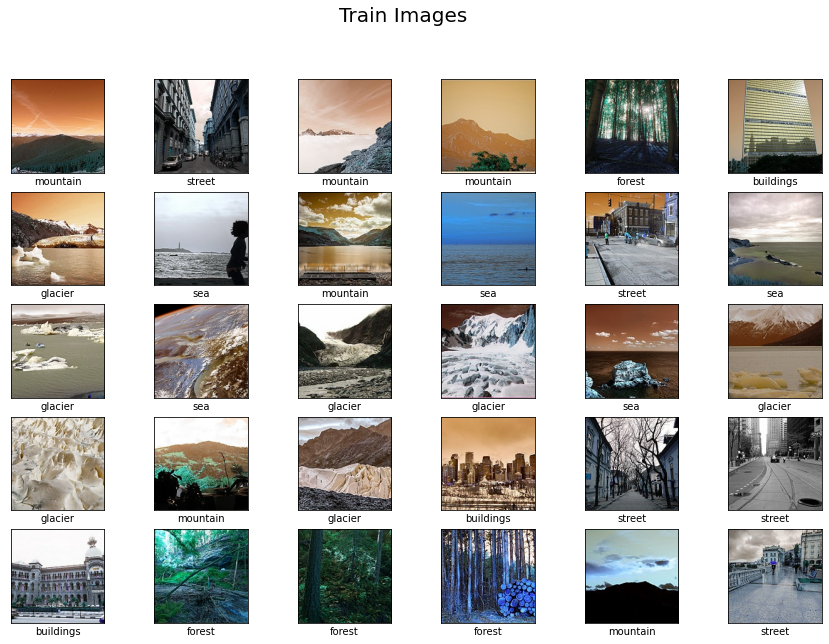

In [12]:
plt.figure(figsize=(15,10))
plt.suptitle("Train Images", fontsize=20)
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(get_Label(train_labels[i]))
    plt.imshow(train_images[i], cmap=plt.cm.binary)

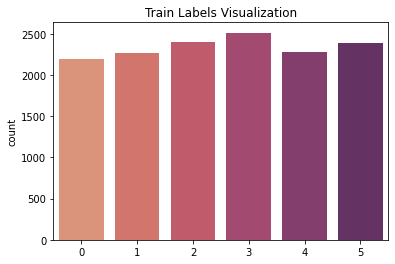

In [13]:
plt.title('Train Labels Visualization')
sns.countplot(x=train_labels,palette='flare')
plt.show()

# Virsialization Test Images 

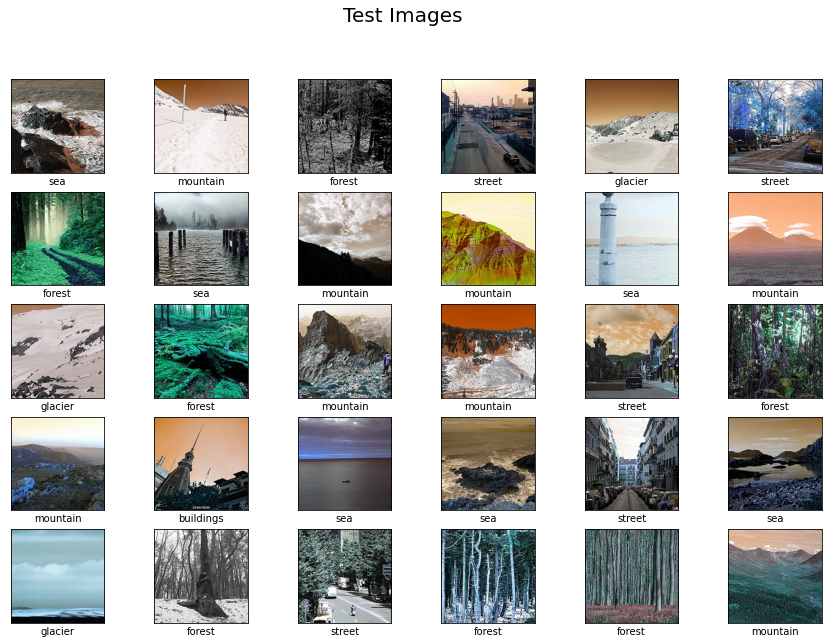

In [14]:
plt.figure(figsize=(15,10))
plt.suptitle("Test Images", fontsize=20)
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(get_Label(test_labels[i]))
    plt.imshow(test_images[i], cmap=plt.cm.binary)

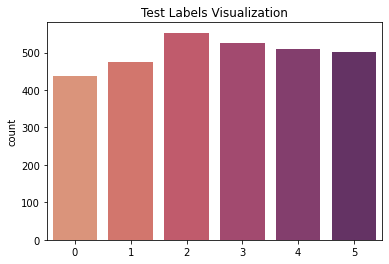

In [15]:
plt.title('Test Labels Visualization')
sns.countplot(x=test_labels,palette='flare')
plt.show()

In [16]:
train_labels = to_categorical(train_labels, 6)
test_labels = to_categorical(test_labels, 6)

# Buliding CNN Model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(100,(5,5), kernel_regularizer=l2(0.00005),padding ='Same',activation = 'relu',input_shape=(150,150,3)))
#model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
# model.add(Dropout(0.2))
model.add(layers.Conv2D(64,(3,3) ,kernel_regularizer=l2(0.00005),padding ='same',activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
# model.add(Dropout(0.2))
model.add(layers.Conv2D(64,(3,3),kernel_regularizer=l2(0.00005),padding ='same',activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(Dropout(0.5))
model.add(layers.Conv2D(32,(3,3),kernel_regularizer=l2(0.00005),padding ='same',activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2,2))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 100)     7600      
                                                                 
 batch_normalization_7 (Batc  (None, 150, 150, 100)    400       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 100)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        57664     
                                                                 
 batch_normalization_8 (Batc  (None, 75, 75, 64)       256       
 hNormalization)                                                 
                                                      

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(layers.Dense(6, activation ='softmax'))

In [ ]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
early = EarlyStopping(monitor="loss", mode="min",min_delta = 0,
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True)
learning_rate_reduction = ReduceLROnPlateau(monitor='loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [ ]:
history = model.fit(train_images,train_labels,epochs=50,batch_size=32,
                    callbacks=callbacks_list,validation_data=(test_images,test_labels))


Epoch 1/50
439/439 [==============================] - 27s 46ms/step - loss: 1.2561 - accuracy: 0.5317 - val_loss: 2.6201 - val_accuracy: 0.2690 - lr: 0.0010
Epoch 2/50
439/439 [==============================] - 19s 43ms/step - loss: 0.8915 - accuracy: 0.6736 - val_loss: 1.5801 - val_accuracy: 0.4870 - lr: 0.0010
Epoch 3/50
439/439 [==============================] - 19s 43ms/step - loss: 0.7501 - accuracy: 0.7393 - val_loss: 2.1633 - val_accuracy: 0.4530 - lr: 0.0010
Epoch 4/50
439/439 [==============================] - 19s 43ms/step - loss: 0.6985 - accuracy: 0.7610 - val_loss: 2.2147 - val_accuracy: 0.3520 - lr: 0.0010
Epoch 5/50
439/439 [==============================] - 19s 43ms/step - loss: 0.6534 - accuracy: 0.7785 - val_loss: 0.8372 - val_accuracy: 0.6697 - lr: 0.0010
Epoch 6/50
439/439 [==============================] - 19s 43ms/step - loss: 0.6009 - accuracy: 0.7986 - val_loss: 1.2879 - val_accuracy: 0.5667 - lr: 0.0010
Epoch 7/50
439/439 [==============================] - 19s 

In [ ]:
model.evaluate(test_images, test_labels)

94/94 [==============================] - 1s 15ms/step - loss: 0.4946 - accuracy: 0.8813


[0.4945630729198456, 0.8813333511352539]

In [ ]:
model.save('/content/drive/MyDrive/model_result/intel_result/intel_CNN.h5')

In [ ]:
cnn_prediction = model.predict(test_images)

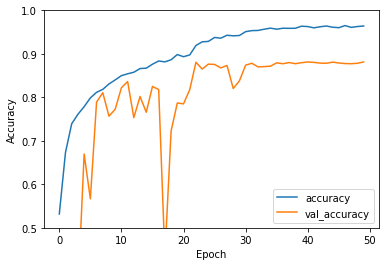

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Predection using CNN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The 'shape' parameter of imshow() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'shape', they should be pass as keyword, not positionally.
  # Remove the CWD from sys.path while we load stuff.


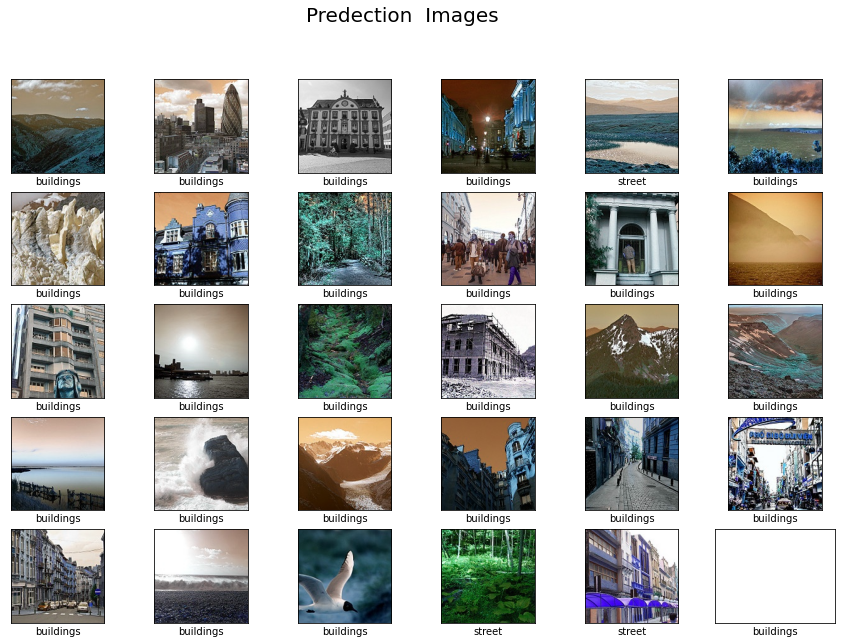

In [ ]:
new_model = load_model('/content/drive/MyDrive/model_result/intel_result/intel_vgg16_89%.h5')
plt.figure(figsize=(15,10))
plt.suptitle("Predection  Images", fontsize=20)
pred_path = '/content/drive/MyDrive/datasets/intel/intel.zip (Unzipped Files)/seg_pred/seg_pred/'
images = []
def plot_predection(path):
    count = 0
    for i,files in enumerate(os.listdir(path)) :
        img = cv2.imread(path+files)  
        plt.imshow(img,shape=((150,150)),cmap=plt.cm.binary)
        img = cv2.resize(img,(150,150))
        img = np.expand_dims(img, axis=0)
        feature = model.predict(img)
        predection  = np.argmax(feature, axis=1)
        plt.subplot(5,6,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel(get_Label(int(predection)))
        count += 1
        if count == 30 :
            break         
plot_predection(pred_path)

# New CNN Model

In [ ]:
batch_size = 32
#create image generator for images 
image_gen = ImageDataGenerator(
                                 # rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.5,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  fill_mode='nearest'

                               )

# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator()
val_data_gen  = ImageDataGenerator()

train = image_gen.flow(
      train_images,
      train_labels,
      shuffle=True, 
      batch_size=batch_size
      )
test = test_data_gen.flow(
      test_images,
      test_labels,
      shuffle=True, 
      batch_size=batch_size
      )


In [ ]:
cnn_model = Sequential()
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(100,(5,5), kernel_regularizer=l2(0.00005),padding ='Same',activation = 'relu',input_shape=(150,150,3)))
#model.add(Dropout(0.3))
cnn_model.add(BatchNormalization())
cnn_model.add(layers.MaxPooling2D(2,2))
# cnn_model.add(Dropout(0.2))
cnn_model.add(layers.Conv2D(64,(5,5) ,kernel_regularizer=l2(0.00005),padding ='same',activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(layers.MaxPooling2D(2,2))
# cnn_model.add(Dropout(0.2))
cnn_model.add(layers.Conv2D(64,(3,3),kernel_regularizer=l2(0.00005),padding ='same',activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(Dropout(0.5))
# cnn_model.add(layers.Conv2D(32,(3,3),kernel_regularizer=l2(0.00005),padding ='same',activation='relu'))
# cnn_model.add(BatchNormalization())
# cnn_model.add(layers.MaxPooling2D(2,2))
#############################
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.5))
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.5))
cnn_model.add(layers.Dense(32, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.3))
cnn_model.add(layers.Dense(6, activation ='softmax'))
cnn_model.summary()





            

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 150, 150, 100)     7600      
                                                                 
 batch_normalization_20 (Bat  (None, 150, 150, 100)    400       
 chNormalization)                                                
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 75, 75, 100)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 75, 75, 64)        160064    
                                                                 
 batch_normalization_21 (Bat  (None, 75, 75, 64)       256       
 chNormalization)                                                
                                                      

In [ ]:
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
# Training model
n_training_samples = len(train)
n_validation_samples = len(test)
history = cnn_model.fit(
    train,
    epochs=50,
    validation_data=test,
    validation_steps=n_validation_samples//batch_size,
    # steps_per_epoch =n_training_samples//batch_size,
    shuffle = True,
    callbacks=callbacks_list
    )

Epoch 1/50
439/439 [==============================] - 63s 140ms/step - loss: 1.5049 - accuracy: 0.4193 - val_loss: 1.3793 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/50
439/439 [==============================] - 61s 140ms/step - loss: 1.1678 - accuracy: 0.5473 - val_loss: 1.3445 - val_accuracy: 0.5156 - lr: 0.0010
Epoch 3/50
439/439 [==============================] - 61s 139ms/step - loss: 1.0373 - accuracy: 0.6104 - val_loss: 1.2881 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/50
439/439 [==============================] - 61s 139ms/step - loss: 0.9743 - accuracy: 0.6451 - val_loss: 0.8616 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 5/50
439/439 [==============================] - 61s 139ms/step - loss: 0.9009 - accuracy: 0.6821 - val_loss: 1.8181 - val_accuracy: 0.4062 - lr: 0.0010
Epoch 6/50
439/439 [==============================] - 61s 139ms/step - loss: 0.8608 - accuracy: 0.6989 - val_loss: 1.1351 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 7/50
439/439 [==============================] 

In [ ]:
score, acc = cnn_model.evaluate(test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

94/94 [==============================] - 1s 14ms/step - loss: 0.3279 - accuracy: 0.8980
Test score: 0.32790958881378174
Test accuracy: 0.8980000019073486


In [ ]:
model.save('/content/drive/MyDrive/model_result/intel_result/intel_CNN.h5')

In [ ]:
cnn_prediction = model.predict(test_images)

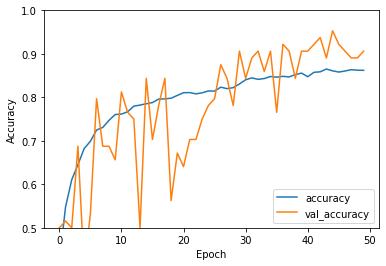

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: The 'shape' parameter of imshow() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'shape', they should be pass as keyword, not positionally.
  if __name__ == '__main__':


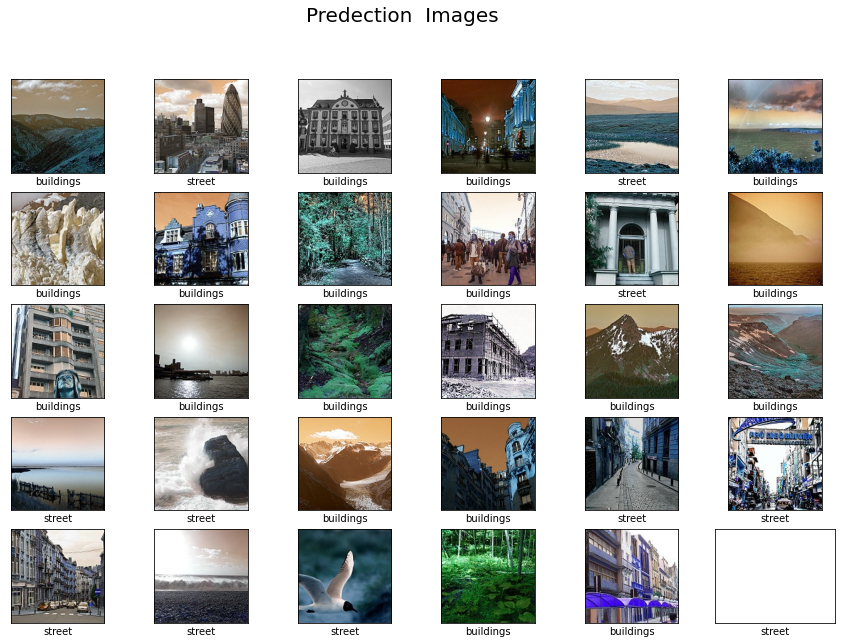

In [ ]:
plt.figure(figsize=(15,10))
plt.suptitle("Predection  Images", fontsize=20)
pred_path = '/content/drive/MyDrive/datasets/intel/intel.zip (Unzipped Files)/seg_pred/seg_pred/'
images = []
def plot_predection(path):
    count = 0
    for i,files in enumerate(os.listdir(path)) :
        img = cv2.imread(path+files)  
        plt.imshow(img,shape=((150,150)),cmap=plt.cm.binary)
        img = cv2.resize(img,(150,150))
        img = np.expand_dims(img, axis=0)
        feature = cnn_model.predict(img)
        predection  = np.argmax(feature, axis=1)
        plt.subplot(5,6,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel(get_Label(int(predection)))
        count += 1
        if count == 30 :
            break         
plot_predection(pred_path)

In [ ]:

y_pred = np.argmax(cnn_prediction, axis=1)
y_test = np.argmax(test_labels, axis=1)
print('accuracy ',accuracy_score(y_test, y_pred))
print('f1 Score : ',f1_score(y_test, y_pred, average="macro"))
print('recall  :',   recall_score(y_test,y_pred,average="macro"))
print('precision ',precision_score(y_test,y_pred,average="macro"))


accuracy  0.8813333333333333
f1 Score :  0.8823806655602996
recall  : 0.8814451288949514
precision  0.8844717002254026


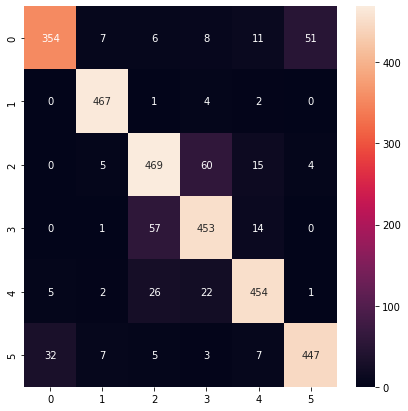

In [ ]:
plt.figure(figsize=(7,7))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       437
           1       0.96      0.99      0.97       474
           2       0.83      0.85      0.84       553
           3       0.82      0.86      0.84       525
           4       0.90      0.89      0.90       510
           5       0.89      0.89      0.89       501

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000



# VGG16 Model

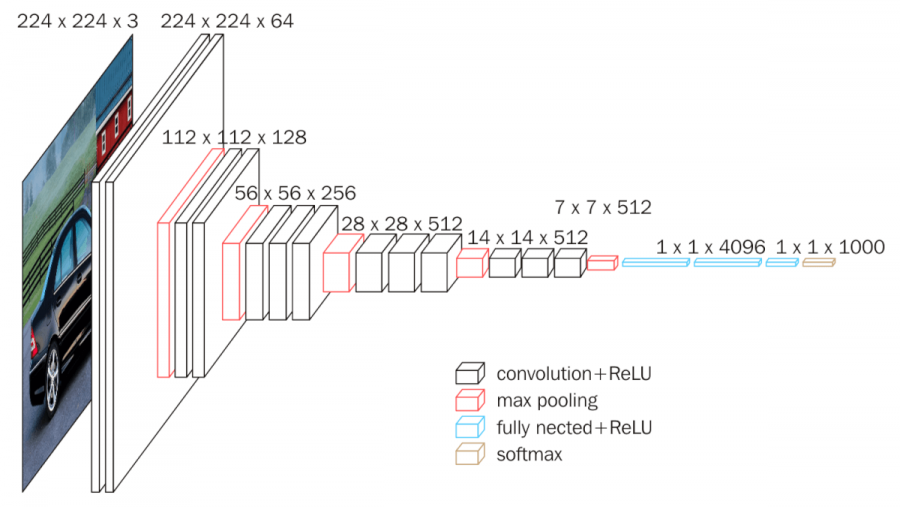

In [ ]:
from IPython.display import Image
Image(filename="/content/drive/MyDrive/datasets/vgg16-1-e1542731207177.png")

VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. It was one of the famous model submitted to ILSVRC-2014. It makes the improvement over AlexNet by replacing large kernel-sized filters (11 and 5 in the first and second convolutional layer, respectively) with multiple 3×3 kernel-sized filters one after another. VGG16 was trained for weeks and was using NVIDIA Titan Black GPU’s.

# Handel VGG model 

1. chose VGG model Layer to be addaptive with  our data 
2. load VGG Weights  
3. removing dense layer from model




In [ ]:
batch_size = 32
#create image generator for images 
image_gen = ImageDataGenerator(
                                 # rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  fill_mode='nearest'

                               )

# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator()
val_data_gen  = ImageDataGenerator()

train = image_gen.flow(
      train_images,
      train_labels,
      shuffle=True, 
      batch_size=batch_size
      )
test = test_data_gen.flow(
      test_images,
      test_labels,
      shuffle=True, 
      batch_size=batch_size
      )

In [ ]:
vgg_base_model = VGG16(input_shape=(150,150,3),weights='imagenet', include_top=False)
vgg_base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
#remove any dense layer from model
for layer in vgg_base_model.layers:
    layer.trainable = False
vgg_base_model.summary()    

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
# new_model = Model(inputs=vgg_base_model.input,outputs=vgg_base_model.get_layer('block5_pool').output)
# new_model.summary()

In [ ]:
new_model = Sequential()
new_model.add(vgg_base_model)
new_model.add(layers.Flatten())
# new_model.add(layers.Dense(128,kernel_regularizer=l2(0.01), activation='relu'))
# new_model.add(BatchNormalization())
# new_model.add(Dropout(0.3))
# new_model.add(layers.Dense(64,kernel_regularizer=l2(0.01), activation='relu'))
# new_model.add(BatchNormalization())
# # new_model.add(Dropout(0.5))
# new_model.add(layers.Dense(32,kernel_regularizer=l2(0.01), activation='relu'))
# new_model.add(BatchNormalization())
# new_model.add(Dropout(0.15))
############################################
# new_model.add(layers.Dense(512,kernel_regularizer=l2(0.01), activation='relu'))
# new_model.add(BatchNormalization())
# new_model.add(Dropout(0.1))
# new_model.add(layers.Dense(15,kernel_regularizer=l2(0.01), activation='relu'))
# new_model.add(BatchNormalization())
# new_model.add(Dropout(0.3))
# new_model.add(layers.Dense(15,kernel_regularizer=l2(0.01), activation='relu'))
# new_model.add(BatchNormalization())
# new_model.add(Dropout(0.5))
new_model.add(layers.Dense(6, activation ='softmax'))
new_model.summary()


# start 85% accuarcy
# new_model.add(layers.Dense(32,kernel_regularizer=l2(0.01), activation='relu'))
# new_model.add(BatchNormalization())
# new_model.add(Dropout(0.3))
# new_model.add(layers.Dense(32,kernel_regularizer=l2(0.01), activation='relu'))
# new_model.add(BatchNormalization())
# # new_model.add(Dropout(0.5))
# new_model.add(layers.Dense(32,kernel_regularizer=l2(0.01), activation='relu'))
# new_model.add(BatchNormalization())
# new_model.add(Dropout(0.2))
# new_model.add(layers.Dense(6, activation ='softmax'))
# new_model.summary()
# end 85% accuarcy


            

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 6)                 49158     
                                                                 
Total params: 14,763,846
Trainable params: 49,158
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
new_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
early = EarlyStopping(monitor="loss", mode="min",min_delta = 0,
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True)
learning_rate_reduction = ReduceLROnPlateau(monitor='loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [ ]:
# Training model
n_training_samples = len(train)
n_validation_samples = len(test)
history = new_model.fit(
    train,
    epochs=50,
    validation_data=test,
    validation_steps=n_validation_samples//batch_size,
    # steps_per_epoch =n_training_samples//batch_size,
    shuffle = True,
    callbacks=callbacks_list
    )

Epoch 1/50
439/439 [==============================] - 62s 141ms/step - loss: 0.5363 - accuracy: 0.8030 - val_loss: 0.3822 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 2/50
439/439 [==============================] - 61s 139ms/step - loss: 0.4124 - accuracy: 0.8511 - val_loss: 0.3393 - val_accuracy: 0.8594 - lr: 0.0010
Epoch 3/50
439/439 [==============================] - 60s 137ms/step - loss: 0.3909 - accuracy: 0.8597 - val_loss: 0.3062 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 4/50
439/439 [==============================] - 60s 137ms/step - loss: 0.3610 - accuracy: 0.8695 - val_loss: 0.2285 - val_accuracy: 0.9219 - lr: 0.0010
Epoch 5/50
439/439 [==============================] - 60s 137ms/step - loss: 0.3461 - accuracy: 0.8739 - val_loss: 0.3986 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 6/50
439/439 [==============================] - 60s 136ms/step - loss: 0.3412 - accuracy: 0.8763 - val_loss: 0.4305 - val_accuracy: 0.8594 - lr: 0.0010
Epoch 7/50
439/439 [==============================] 

In [ ]:
# new_model = load_model('/content/drive/MyDrive/model_result/intel_result/intel_vgg16,86.5%.h5')

In [ ]:
predict = new_model.predict(test)

In [ ]:
score, acc = new_model.evaluate(test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

94/94 [==============================] - 3s 34ms/step - loss: 0.3082 - accuracy: 0.8917
Test score: 0.30821841955184937
Test accuracy: 0.8916666507720947


In [ ]:
#new_model.save('/content/drive/MyDrive/model_result/intel_result/intel_vgg16_89%.h5')

In [ ]:
new_model = load_model('/content/drive/MyDrive/model_result/intel_result/intel_vgg16_89%.h5')

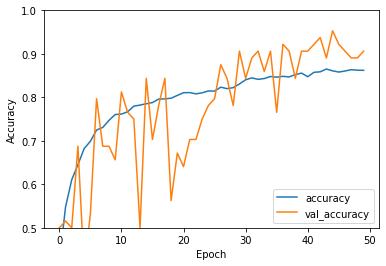

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
predict = new_model.predict(test)
y_pred = np.argmax(predict, axis=1)
y_test = np.argmax(test_labels, axis=1)
print('f1 Score : ',f1_score(y_test, y_pred, average="macro"))
print('recall  :',   recall_score(y_test,y_pred,average="macro"))
print('precision ',precision_score(y_test,y_pred,average="macro"))

f1 Score :  0.167918326264809
recall  : 0.16802617174598164
precision  0.16792206843406207


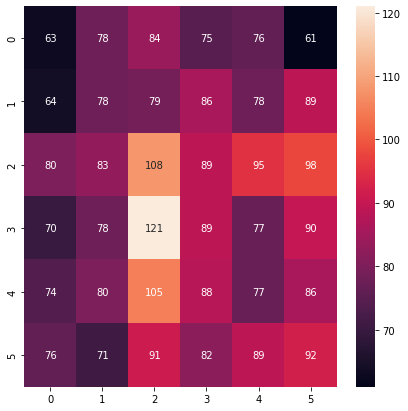

In [ ]:
plt.figure(figsize=(7,7))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.15      0.14      0.15       437
           1       0.17      0.16      0.17       474
           2       0.18      0.20      0.19       553
           3       0.17      0.17      0.17       525
           4       0.16      0.15      0.15       510
           5       0.18      0.18      0.18       501

    accuracy                           0.17      3000
   macro avg       0.17      0.17      0.17      3000
weighted avg       0.17      0.17      0.17      3000



# Predection using vgg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The 'shape' parameter of imshow() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'shape', they should be pass as keyword, not positionally.
  # Remove the CWD from sys.path while we load stuff.


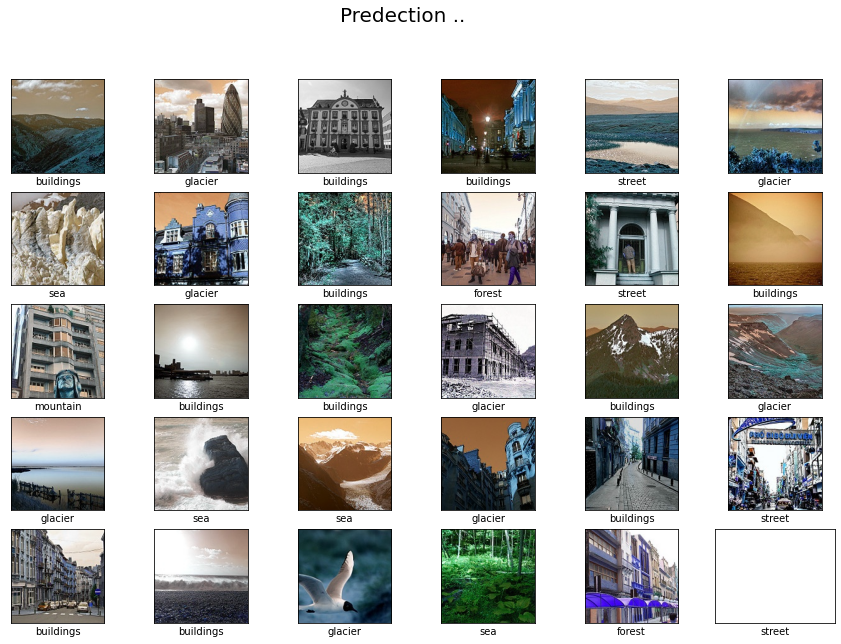

In [ ]:
new_model = load_model('/content/drive/MyDrive/model_result/intel_result/intel_vgg16_89%.h5')
plt.figure(figsize=(15,10))
plt.suptitle(" Predection ..", fontsize=20)
pred_path = '/content/drive/MyDrive/datasets/intel/intel.zip (Unzipped Files)/seg_pred/seg_pred/'
images = []
def plot_predection(path):
    count = 0
    for i,files in enumerate(os.listdir(path)) :
        img = cv2.imread(path+files)  
        plt.imshow(img,shape=((150,150)),cmap=plt.cm.binary)
        img = cv2.resize(img,(150,150))
        img = np.expand_dims(img, axis=0)
        feature = new_model.predict(img)
        predection  = np.argmax(feature, axis=1)
        plt.subplot(5,6,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel(get_Label(int(predection)))
        count += 1
        if count == 30 :
            break         
plot_predection(pred_path)

# ResNet Model

In [ ]:
batch_size = 32
#create image generator for images 
image_gen = ImageDataGenerator(
                                 # rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  fill_mode='nearest',
                                  horizontal_flip=True,

                               )

# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator()
val_data_gen  = ImageDataGenerator()

train = image_gen.flow(
      train_images,
      train_labels,
      shuffle=True, 
      batch_size=batch_size
      )
test = test_data_gen.flow(
      test_images,
      test_labels,
      shuffle=True, 
      batch_size=batch_size
      )

In [ ]:
resnet_base_model = ResNet50(include_top=False, weights="imagenet", input_shape=(150,150,3), pooling="avg")

In [ ]:
#remove any dense layer from model
for layer in resnet_base_model.layers:
    layer.trainable = False
  

In [ ]:
resnet = Sequential()
resnet.add(resnet_base_model)
resnet.add(layers.Flatten())
resnet.add(layers.Dense(1024 ,activation='relu'))
resnet.add(BatchNormalization())
resnet.add(Dropout(0.2))
resnet.add(layers.Dense(6, activation ='softmax'))
resnet.summary()



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_8 (Flatten)         (None, 2048)              0         
                                                                 
 dense_15 (Dense)            (None, 1024)              2098176   
                                                                 
 batch_normalization_6 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_16 (Dense)            (None, 6)                 6150      
                                                      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
early = EarlyStopping(monitor="loss", mode="min",min_delta = 0,
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True)
learning_rate_reduction = ReduceLROnPlateau(monitor='loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [ ]:
resnet.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Training model
n_training_samples = len(train)
n_validation_samples = len(test)
history = resnet.fit(
    train,
    epochs=50,
    validation_data=test,
    validation_steps=n_validation_samples//batch_size,
    # steps_per_epoch =n_training_samples//batch_size,
    shuffle = True,
    callbacks=callbacks_list
    )

Epoch 1/50
439/439 [==============================] - 66s 144ms/step - loss: 1.1368 - accuracy: 0.5668 - val_loss: 3.1303 - val_accuracy: 0.2031 - lr: 0.0010
Epoch 2/50
439/439 [==============================] - 62s 141ms/step - loss: 1.0263 - accuracy: 0.6073 - val_loss: 4.0905 - val_accuracy: 0.3594 - lr: 0.0010
Epoch 3/50
439/439 [==============================] - 62s 141ms/step - loss: 0.9841 - accuracy: 0.6257 - val_loss: 3.4909 - val_accuracy: 0.4531 - lr: 0.0010
Epoch 4/50
439/439 [==============================] - 62s 141ms/step - loss: 0.9715 - accuracy: 0.6253 - val_loss: 3.7890 - val_accuracy: 0.4219 - lr: 0.0010
Epoch 5/50
439/439 [==============================] - 62s 141ms/step - loss: 0.9539 - accuracy: 0.6355 - val_loss: 1.0694 - val_accuracy: 0.6406 - lr: 0.0010
Epoch 6/50
439/439 [==============================] - 62s 142ms/step - loss: 0.9432 - accuracy: 0.6400 - val_loss: 1.6881 - val_accuracy: 0.4531 - lr: 0.0010
Epoch 7/50
439/439 [==============================] 

In [ ]:
predict = resnet.predict(test)

In [ ]:
score, acc = resnet.evaluate(test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

94/94 [==============================] - 4s 39ms/step - loss: 0.8002 - accuracy: 0.7137
Test score: 0.8002461194992065
Test accuracy: 0.7136666774749756


In [ ]:
resnet.save('/content/drive/MyDrive/model_result/intel_result/intel_resnet.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


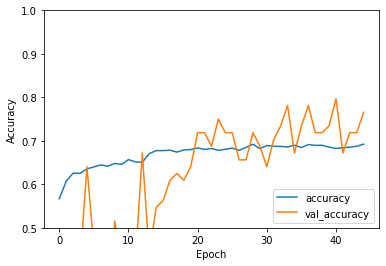

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
predict = resnet.predict(test)
y_pred = np.argmax(predict, axis=1)
y_test = np.argmax(test_labels, axis=1)
print('f1 Score : ',f1_score(y_test, y_pred, average="macro"))
print('recall  :',   recall_score(y_test,y_pred,average="macro"))
print('precision ',precision_score(y_test,y_pred,average="macro"))

f1 Score :  0.1670567969242587
recall  : 0.16924018689718667
precision  0.1697267857428575


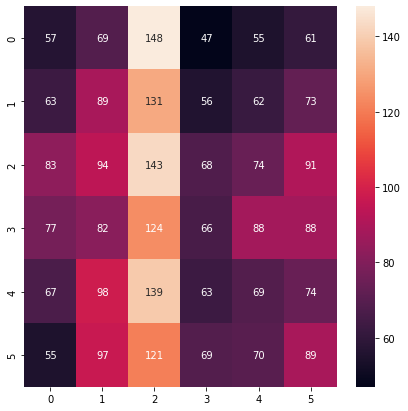

In [ ]:
plt.figure(figsize=(7,7))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.14      0.13      0.14       437
           1       0.17      0.19      0.18       474
           2       0.18      0.26      0.21       553
           3       0.18      0.13      0.15       525
           4       0.17      0.14      0.15       510
           5       0.19      0.18      0.18       501

    accuracy                           0.17      3000
   macro avg       0.17      0.17      0.17      3000
weighted avg       0.17      0.17      0.17      3000



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: The 'shape' parameter of imshow() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'shape', they should be pass as keyword, not positionally.
  if __name__ == '__main__':


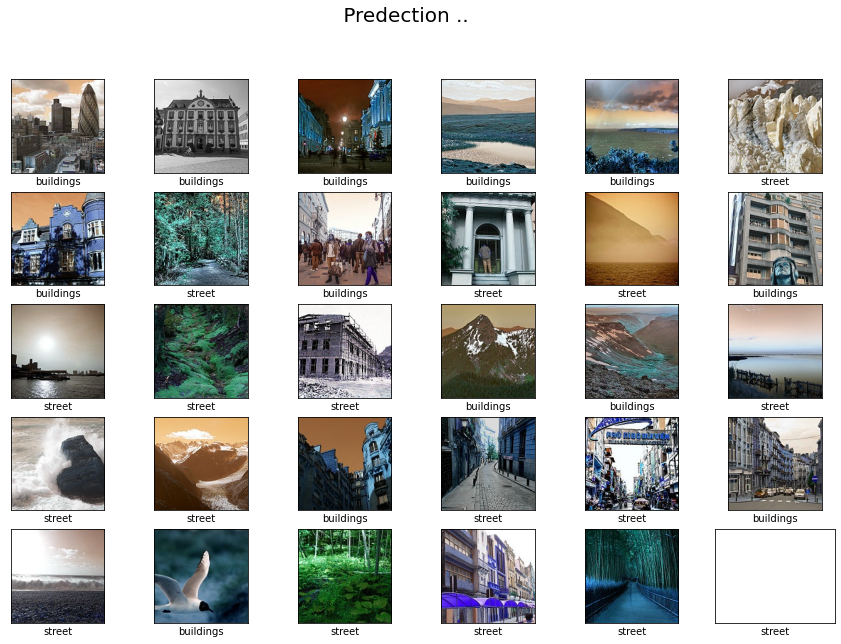

In [ ]:
plt.figure(figsize=(15,10))
plt.suptitle(" Predection ..", fontsize=20)
pred_path = '/content/drive/MyDrive/datasets/intel/intel.zip (Unzipped Files)/seg_pred/seg_pred/'
images = []
def plot_predection(path):
    count = 0
    for i,files in enumerate(os.listdir(path)) :
        img = cv2.imread(path+files)  
        plt.imshow(img,shape=((150,150)),cmap=plt.cm.binary)
        img = cv2.resize(img,(150,150))
        img = np.expand_dims(img, axis=0)
        feature = resnet.predict(img)
        predection  = np.argmax(feature, axis=1)
        plt.subplot(5,6,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel(get_Label(int(predection)))
        count += 1
        if count == 30 :
            break         
plot_predection(pred_path)

# Xception Model

In [17]:
batch_size = 32
#create image generator for images 
image_gen = ImageDataGenerator(
                                 # rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  fill_mode='nearest',
                                  horizontal_flip=True,

                               )

# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator()
val_data_gen  = ImageDataGenerator()

train = image_gen.flow(
      train_images,
      train_labels,
      shuffle=True, 
      batch_size=batch_size
      )
test = test_data_gen.flow(
      test_images,
      test_labels,
      shuffle=True, 
      batch_size=batch_size
      )

In [18]:
xception_base_model = Xception(include_top=False,weights='imagenet',input_shape = (150,150,3))


In [19]:
#remove any dense layer from model
for layer in xception_base_model.layers:
    layer.trainable = False
  

In [20]:
excmodel = Sequential()
excmodel.add(xception_base_model)
excmodel.add(layers.Flatten())
excmodel.add(layers.Dense(1024 ,activation='relu'))
excmodel.add(BatchNormalization())
# excmodel.add(Dropout(0.2))
excmodel.add(layers.Dense(6, activation ='softmax'))
excmodel.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 1024)              52429824  
                                                                 
 batch_normalization_4 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 6)                 6150      
                                                                 
Total params: 73,301,550
Trainable params: 52,438,022
Non-trainable params: 20,863,528
___________________________________

In [21]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
early = EarlyStopping(monitor="loss", mode="min",min_delta = 0,
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True)
learning_rate_reduction = ReduceLROnPlateau(monitor='loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [22]:
excmodel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
# Training model
n_training_samples = len(train)
n_validation_samples = len(test)
history = excmodel.fit(
    train,
    epochs=50,
    validation_data=test,
    validation_steps=n_validation_samples//batch_size,
    # steps_per_epoch =(n_training_samples//batch_size)*2,
    shuffle = True,
    callbacks=callbacks_list
    )

Epoch 1/50
439/439 [==============================] - 67s 153ms/step - loss: 0.5039 - accuracy: 0.8238 - val_loss: 0.5632 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 2/50
439/439 [==============================] - 63s 144ms/step - loss: 0.4091 - accuracy: 0.8505 - val_loss: 0.1562 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 3/50
439/439 [==============================] - 63s 144ms/step - loss: 0.3769 - accuracy: 0.8620 - val_loss: 0.2908 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 4/50
439/439 [==============================] - 63s 144ms/step - loss: 0.3666 - accuracy: 0.8645 - val_loss: 0.3255 - val_accuracy: 0.8906 - lr: 0.0010
Epoch 5/50
439/439 [==============================] - 63s 144ms/step - loss: 0.3478 - accuracy: 0.8735 - val_loss: 0.2348 - val_accuracy: 0.9219 - lr: 0.0010
Epoch 6/50
439/439 [==============================] - 63s 143ms/step - loss: 0.3311 - accuracy: 0.8765 - val_loss: 0.4486 - val_accuracy: 0.8281 - lr: 0.0010
Epoch 7/50
439/439 [==============================] 

In [25]:
score, acc = excmodel.evaluate(test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

94/94 [==============================] - 4s 43ms/step - loss: 0.3408 - accuracy: 0.9053
Test score: 0.3407914638519287
Test accuracy: 0.9053333401679993


In [26]:
excmodel.save('/content/drive/MyDrive/model_result/intel_result/intel_exeeption.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


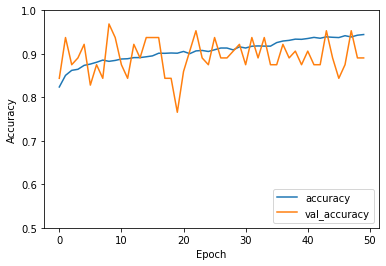

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [28]:
predict = excmodel.predict(test)
y_pred = np.argmax(predict, axis=1)
y_test = np.argmax(test_labels, axis=1)
print('f1 Score : ',f1_score(y_test, y_pred, average="macro"))
print('recall  :',   recall_score(y_test,y_pred,average="macro"))
print('precision ',precision_score(y_test,y_pred,average="macro"))

f1 Score :  0.16508283252606556
recall  : 0.16498971379523641
precision  0.1652085435627827


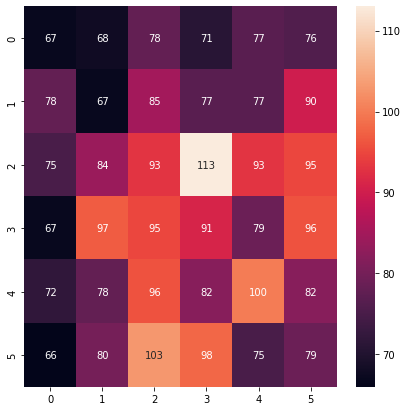

In [29]:
plt.figure(figsize=(7,7))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.16      0.15      0.16       437
           1       0.14      0.14      0.14       474
           2       0.17      0.17      0.17       553
           3       0.17      0.17      0.17       525
           4       0.20      0.20      0.20       510
           5       0.15      0.16      0.16       501

    accuracy                           0.17      3000
   macro avg       0.17      0.16      0.17      3000
weighted avg       0.17      0.17      0.17      3000



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The 'shape' parameter of imshow() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'shape', they should be pass as keyword, not positionally.
  # Remove the CWD from sys.path while we load stuff.


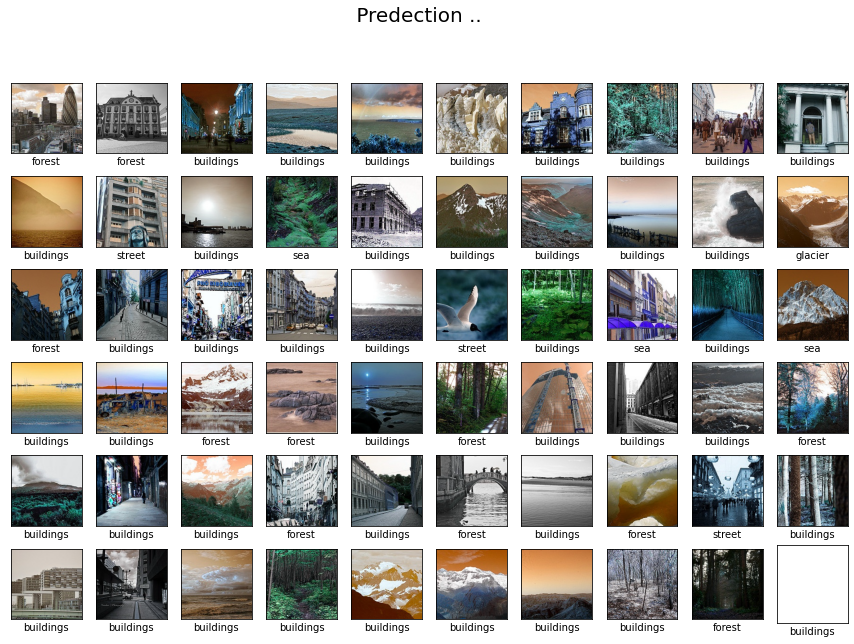

In [32]:

plt.figure(figsize=(15,10))
plt.suptitle(" Predection ..", fontsize=20)
pred_path = '/content/drive/MyDrive/datasets/intel/intel.zip (Unzipped Files)/seg_pred/seg_pred/'
images = []
def plot_predection(path):
    count = 0
    for i,files in enumerate(os.listdir(path)) :
        img = cv2.imread(path+files)  
        plt.imshow(img,shape=((150,150)),cmap=plt.cm.binary)
        img = cv2.resize(img,(150,150))
        img = np.expand_dims(img, axis=0)
        feature = excmodel.predict(img)
        predection  = np.argmax(feature, axis=1)
        plt.subplot(6,10,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel(get_Label(int(predection)))
        count += 1
        if count == 60 :
            break         
plot_predection(pred_path)

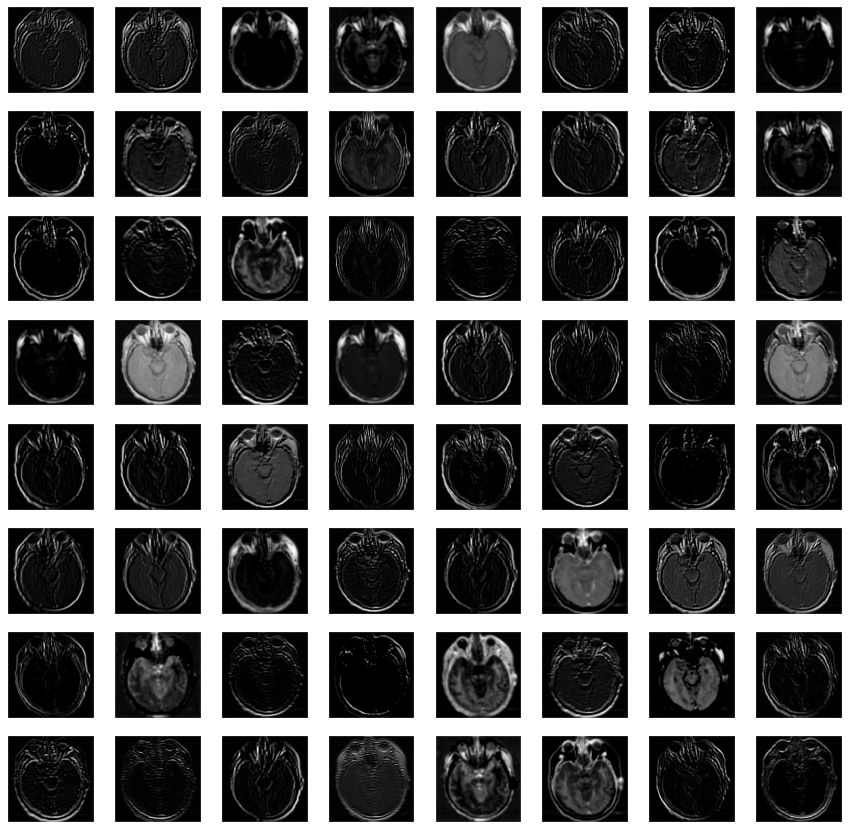

In [ ]:
plt.figure(figsize=(15,15))
square = 8
ix=1
for _ in range(square):
    for _ in range(square):
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(features[0,:,:,ix-1], cmap='gray')
        ix +=1
plt.show()

# handel data  with RandomForestClassifier

1.   convert shape of features and label to same shape of RandomForestClassifier
2.   convert x,y to random forest shape(x,y)
1.   create data frame to reject zero pixel 
2.   List item


In [ ]:
print('x  before reshapping  Is :{}'.format(x.shape))
x = features
#shape of random forest is (x,y)only
x = x.reshape(-1,x.shape[3])
y = y_train.reshape(-1)
print('x  Shape  Is :{}'.format(x.shape))
print('y  Shape  Is :{}'.format(y.shape))

x  before reshapping  Is :(2000, 128, 128, 64)
x  Shape  Is :(32768000, 64)
y  Shape  Is :(32768000,)


In [ ]:
#remove zero pixels befor training
df = pd.DataFrame(x)
df['label'] = y
print(df['label'].unique())
print(df['label'].value_counts())

[  0  64 255 191 128]
0      32420250
255      301794
128       20800
64        12999
191       12157
Name: label, dtype: int64


In [ ]:
df = df[df['label']!=0]
x_rf = df.drop(labels=['label'],axis=1)
y_rf = df['label']

In [ ]:
#call rf classifier
rf_model = RandomForestClassifier(n_estimators=50,random_state=42,verbose=True)
rf_model.fit(x_rf,y_rf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.7min finished


RandomForestClassifier(n_estimators=50, random_state=42, verbose=True)

In [ ]:
import pickle
filename = '/content/drive/MyDrive/model_result/vgg_segmentaion/RF_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))

# predected model & test result

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


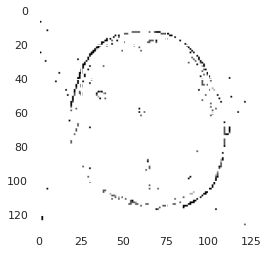

In [ ]:
saved_model = pickle.load(open('/content/drive/MyDrive/model_result/vgg_segmentaion/RF_model.sav', 'rb'))
test_img = cv2.imread('/content/drive/MyDrive/datasets/brain_tumer.zip (Unzipped Files)/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_18.tif', cv2.IMREAD_COLOR)       
#test_img = cv2.imread('/content/drive/MyDrive/datasets/brain_tumer.zip (Unzipped Files)/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_10_mask.tif', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (128, 128))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)
#call vgg model
test_image_feature = new_model.predict(test_img)
#reshape image 
test_image_feature = test_image_feature.reshape(-1,test_image_feature.shape[3])
#start predect masked image
new_predection = saved_model.predict(test_image_feature)
new_predicted_image = new_predection.reshape(128,128)
plt.imshow(new_predicted_image, cmap='gray')
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


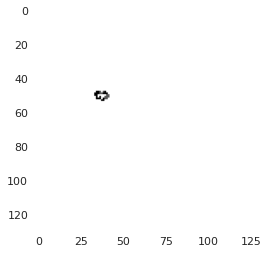

In [ ]:
saved_model = pickle.load(open('/content/drive/MyDrive/model_result/vgg_segmentaion/RF_model.sav', 'rb'))
test_img = cv2.imread('/content/drive/MyDrive/datasets/brain_tumer.zip (Unzipped Files)/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_18_mask.tif', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (128, 128))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)
#call vgg model
test_image_feature = new_model.predict(test_img)
#reshape image 
test_image_feature = test_image_feature.reshape(-1,test_image_feature.shape[3])
#start predect masked image
new_predection = saved_model.predict(test_image_feature)
new_predicted_image = new_predection.reshape(128,128)

plt.imshow(new_predicted_image, cmap='gray')
plt.show()